In [173]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [174]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [175]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [177]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

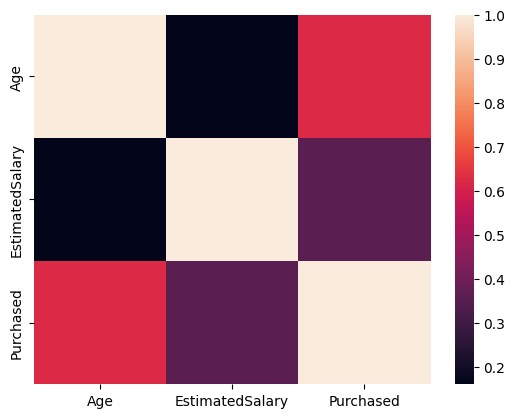

In [178]:
correaltion_matrix=df.corr().round(2)
sns.heatmap(data=correaltion_matrix)

<Axes: >

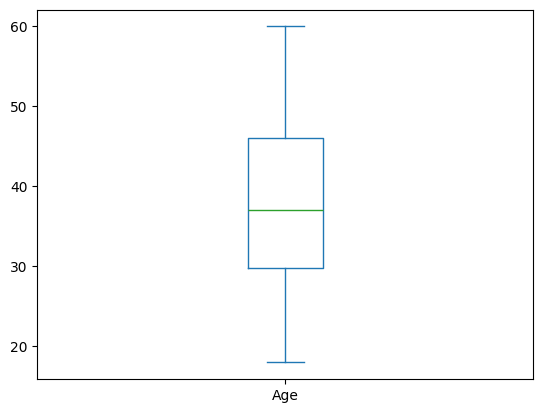

In [179]:
df['Age'].plot.box()

<Axes: >

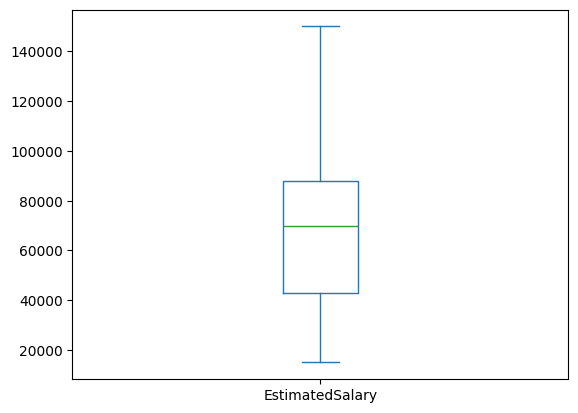

In [180]:
df['EstimatedSalary'].plot.box()

In [181]:
x = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

Splitting the data

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [183]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [184]:
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1
 0 0 0 0 0 0]


In [185]:
mse=mean_squared_error(y_test,y_pred)
mse

0.1375

In [186]:
import numpy as np
rmse=np.sqrt(mse)
rmse

0.37080992435478316

In [188]:
r2_score=model.score(x_test,y_test)
r2_score

0.8625

In [189]:
y_comp=np.vstack((y_test,y_pred))
y_comp

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

Confusion matrix

In [190]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[47,  6],
       [ 5, 22]], dtype=int64)

In [191]:
print('TN',cm[0,0])
print('FP',cm[0,1])
print('FN',cm[1,0])
print('TP',cm[1,1])



TN 47
FP 6
FN 5
TP 22


In [159]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_pred)
print('The accuracy value : ', a)

The accuracy value :  0.875


In [192]:
from sklearn.metrics import average_precision_score
print('The Average Precision score: ',average_precision_score(y_test, y_pred) )

The Average Precision score:  0.7027116402116401


In [193]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('The mean square error :',mse)

The mean square error : 0.1375
